In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from kalman_filter import KalmanFilter

### Aufgabe 4

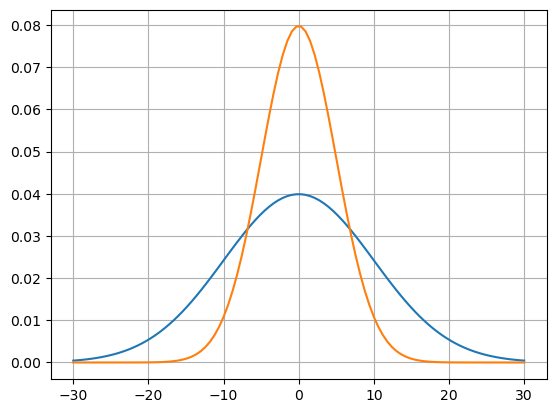

In [7]:
sigma = 10
m = 0

x = np.linspace(-30,30,100)

plt.figure()
plt.plot(x, stats.norm.pdf(x, m, sigma))
plt.plot(x, stats.norm.pdf(x, m, sigma/np.sqrt(4)))
plt.grid(True)

In [8]:
def correlate(x, y): 
    """
    correlates x with y
    
    ! moves y !
    """
    rxy = np.correlate(y, x, 'full')
    lags = np.arange(-len(y)+1, len(x), dtype=int)[::-1]

    return np.column_stack((lags, rxy))

[[ 6. -1.]
 [ 5.  0.]
 [ 4. -1.]
 [ 3.  0.]
 [ 2. -1.]
 [ 1.  0.]
 [ 0.  7.]
 [-1.  0.]
 [-2. -1.]
 [-3.  0.]
 [-4. -1.]
 [-5.  0.]
 [-6. -1.]]


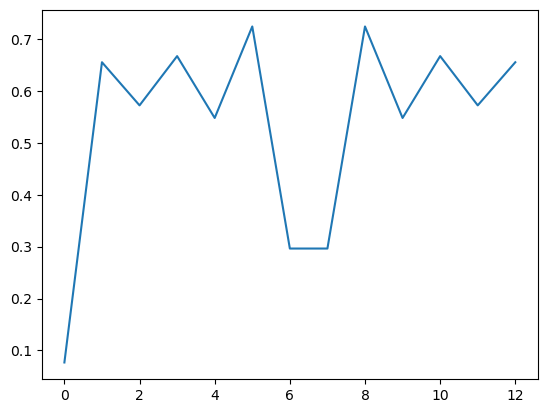

In [10]:
x = np.array([1,1,1,-1,-1,1,-1],dtype=float)

rxx = correlate(x,x)
print(rxx)


pxx = np.abs(np.fft.fft(rxx[:,1])/len(rxx))

plt.figure()
plt.plot(pxx)

### Aufgabe 5

In [12]:
N_FIR = 0   # filter ordnung
N_Iter = 4  # lms iterationen
mu_max = 1 / (N_FIR + 1) # maximale learnrate

enable_print = True

# learnrate
mu = 0.1*mu_max
mu = 1

# init vektoren
b = np.zeros(N_FIR + 1)
e = np.zeros(N_Iter)
y = np.zeros(N_Iter)

# soll signal
d = np.array([2, 1.42, 0, -1.42])

# input signal
x = np.array([1, 0.71, 0, -0.71], dtype=float)
x = np.array([x[start:start+N_FIR+1] for start in np.arange(len(x)-N_FIR)])
x = x[:, ::-1]

print(x)

# lms
for n in range(N_Iter):
    # calc y[n]
    y[n] = b@x[n]

    # calc e[n]
    e[n] = d[n] - y[n]
    
    if enable_print:
        print(f'Iteration {n}:')
        print(f'\tx[{n}] = {x[n]}')
        print(f'\tb[{n}] = {b}')
        print(f'\ty[{n}] = {y[n]}')
        print(f'\td[{n}] = {d[n]}')
        print(f'\te[{n}] = {e[n]}')
        print()
    
    # calc b[n]
    b += 2*mu*e[n]*x[n]

print(f'b = {b}')

[[ 1.  ]
 [ 0.71]
 [ 0.  ]
 [-0.71]]
Iteration 0:
	x[0] = [1.]
	b[0] = [0.]
	y[0] = 0.0
	d[0] = 2.0
	e[0] = 2.0

Iteration 1:
	x[1] = [0.71]
	b[1] = [4.]
	y[1] = 2.84
	d[1] = 1.42
	e[1] = -1.42

Iteration 2:
	x[2] = [0.]
	b[2] = [1.9836]
	y[2] = 0.0
	d[2] = 0.0
	e[2] = 0.0

Iteration 3:
	x[3] = [-0.71]
	b[3] = [1.9836]
	y[3] = -1.408356
	d[3] = -1.42
	e[3] = -0.011643999999999988

b = [2.00013448]


### Aufgabe 6

In [13]:
# soll signal
d = np.array([1.8, 4.7, 5.4, 10.2, 9.9])

# input signal
x = np.array([1,2,3,4,5], dtype=float)
x = np.array([x[start:start+N_FIR+1] for start in np.arange(len(x)-N_FIR)])
x = x[:, ::-1]

# bls
bls = np.linalg.pinv(x)@d

print(bls)


[2.14]
